## Inicialmente tenho uma celula para resolver imports e o caminho do dataset csv no meu diretório
### _Nesse caso o csv foi guardado num caminho ./datasets/evasao/evasao.csv_

In [291]:
import os
import pandas as pd
import numpy as np
import sklearn as sk

# Resolvendo o caminho para o arquivo csv e guardar em csv_file
base_dir = os.getcwd()
csv_file = os.path.join(base_dir, "datasets", "evasao", "evasao.csv")

In [292]:
def load_evasion_data(csv_path=csv_file):
    return pd.read_csv(csv_path)

evasao = load_evasion_data()

### Agora com o arquivo carregado para entender o problema eu vou analisar as primeiras linhas, e depois analisar informações com relação as colunas

In [293]:
# Imprime as 5 primeiras linhas da tabela
evasao.head()

,curriculum_id,student_id,centro,department_name,course_name,student_age_at_initial_period,birthday,birth_place,ingress_form,locks_number,...,optative_ch_progress,curriculum_status,leaving_reason,mc,course_mc,iepl,course_iepl,iech,course_iech,iea
0,122,97,CCET,DCOMP,CIÊNCIA DA COMPUTAÇÃO,30,1964-05-14,PORTO ALEGRE/RS,TRANSFERÊNCIA COMPULSÓRIA,0,...,100.0,CANCELADO,DECURSO DE PRAZO MÁXIMO P/ CONCLUSÃO DE CURSO,1.79,4.537049,0.300,0.476704,0.300,0.530138,0.1611
1,215,167,CCET,DCOMP,CIÊNCIA DA COMPUTAÇÃO,18,1980-05-11,ARACAJU/SE,VESTIBULAR,0,...,100.0,CANCELADO,ABANDONO,6.69,4.537049,0.300,0.476704,0.367,0.530138,0.7366
2,348,285,CCET,DCOMP,CIÊNCIA DA COMPUTAÇÃO,19,1983-10-26,ARACAJU/SE,VESTIBULAR,0,...,100.0,CANCELADO,ABANDONO,6.66,4.537049,0.300,0.476704,0.446,0.530138,0.8911
3,352,289,CCET,DCOMP,CIÊNCIA DA COMPUTAÇÃO,21,1981-08-08,RIO DE JANEIRO/RJ,VESTIBULAR,0,...,100.0,CANCELADO,ABANDONO,6.71,4.537049,0.300,0.476704,0.411,0.530138,0.8273
4,414,351,CCET,DCOMP,CIÊNCIA DA COMPUTAÇÃO,18,1986-02-10,ARACAJU/SE,VESTIBULAR,0,...,100.0,CONCLUÍDO,CONCLUÍDO,6.55,4.537049,0.325,0.476704,0.429,0.530138,0.9132


In [294]:
# Imprime 
evasao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   curriculum_id                  2603 non-null   int64  
 1   student_id                     2603 non-null   int64  
 2   centro                         2603 non-null   object 
 3   department_name                2603 non-null   object 
 4   course_name                    2603 non-null   object 
 5   student_age_at_initial_period  2603 non-null   int64  
 6   birthday                       2603 non-null   object 
 7   birth_place                    2600 non-null   object 
 8   ingress_form                   2603 non-null   object 
 9   locks_number                   2603 non-null   int64  
 10  required_ch_progress           2603 non-null   float64
 11  optative_ch_progress           2603 non-null   float64
 12  curriculum_status              2603 non-null   o

### Primeiro vou verificar as colunas que não são númericas, o python marcar como object mas como vem de um arquivo csv provavelmente são strings, a ideia é entender se são atributos categóricos e realizar transformações

In [295]:
# utilizando values_counts() para quais são os valores e quantas repetições
evasao['centro'].value_counts()
# evasao['department_name'].value_counts()

centro
CCET    2603
Name: count, dtype: int64

In [296]:
evasao['course_name'].value_counts()

course_name
CIÊNCIA DA COMPUTAÇÃO       1234
SISTEMAS DE INFORMAÇÃO       693
ENGENHARIA DE COMPUTAÇÃO     676
Name: count, dtype: int64

In [297]:
evasao['birthday'].value_counts()

birthday
1999-09-09    8
2000-06-06    6
1994-09-07    4
1996-03-21    4
2000-03-18    4
             ..
2003-11-09    1
2004-05-15    1
2004-08-22    1
1987-02-02    1
1989-08-04    1
Name: count, Length: 2087, dtype: int64

In [298]:
evasao['birth_place'].value_counts()

birth_place
ARACAJU/SE               1523
ITABAIANA/SE              124
LAGARTO/SE                 87
SÃO CRISTÓVÃO/SE           68
SALVADOR/BA                57
                         ... 
SÃO CAETANO DO SUL/SP       1
PLANALTO/BA                 1
XIQUE-XIQUE/BA              1
SOUTO SOARES/BA             1
BREJO SANTO/CE              1
Name: count, Length: 218, dtype: int64

In [299]:
evasao['ingress_form'].value_counts()

ingress_form
VESTIBULAR                   2276
TRANSFERÊNCIA INTERNA         257
PORTADOR DE DIPLOMA            39
TRANSFERÊNCIA VOLUNTÁRIA       18
TRANSFERÊNCIA COMPULSÓRIA       7
READMISSÃO                      3
SUB JUDICE                      3
Name: count, dtype: int64

In [300]:
evasao['curriculum_status'].value_counts()

curriculum_status
CANCELADO                      1188
ATIVO                          1004
CONCLUÍDO                       329
TRANCADO                         61
FORMANDO                         12
Índices Acadêmicos                8
Ano/Período Letivo Inicial:       1
Name: count, dtype: int64

In [301]:
evasao['leaving_reason'].value_counts()

leaving_reason
ABANDONO                                                                               730
CONCLUÍDO                                                                              329
CANC.. NOVO VESTIBULAR                                                                 143
Transferência Interna                                                                  122
CANCELAMENTO ESPONTÂNEO                                                                 76
DECURSO DE PRAZO MÁXIMO P/ CONCLUSÃO DE CURSO                                           73
Não atendeu à convocação para o Cadastro Específico conforme Edital 21/2017/PROGRAD     35
TRANSF.P/OUTRA IES                                                                       4
CADASTRO CANCELADO                                                                       3
NÃO CONFIRMAÇÃO VÍNCULO                                                                  2
Name: count, dtype: int64

### As colunas id são apenas identificação e não correspondem a nada, a leaving_reason possui valores null e não consigo enxergar como a máquina traduziria, já que é pós o fato, logo em um usuário que estivesse sendo avaliado esse campo deveria ser vazio

In [302]:
# é possível perceber que os dados são nichados e para reduzir o trabalho vou descartar algumas colunas no momento
evasao_reduzido = evasao.drop(columns=["curriculum_id","student_id","centro", "department_name","birthday", "leaving_reason"])
evasao_reduzido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   course_name                    2603 non-null   object 
 1   student_age_at_initial_period  2603 non-null   int64  
 2   birth_place                    2600 non-null   object 
 3   ingress_form                   2603 non-null   object 
 4   locks_number                   2603 non-null   int64  
 5   required_ch_progress           2603 non-null   float64
 6   optative_ch_progress           2603 non-null   float64
 7   curriculum_status              2603 non-null   object 
 8   mc                             2603 non-null   float64
 9   course_mc                      2603 non-null   float64
 10  iepl                           2603 non-null   float64
 11  course_iepl                    2603 non-null   float64
 12  iech                           2603 non-null   f

<module 'matplotlib' from '/home/motamarcelo/jupyter-env/lib/python3.12/site-packages/matplotlib/__init__.py'>

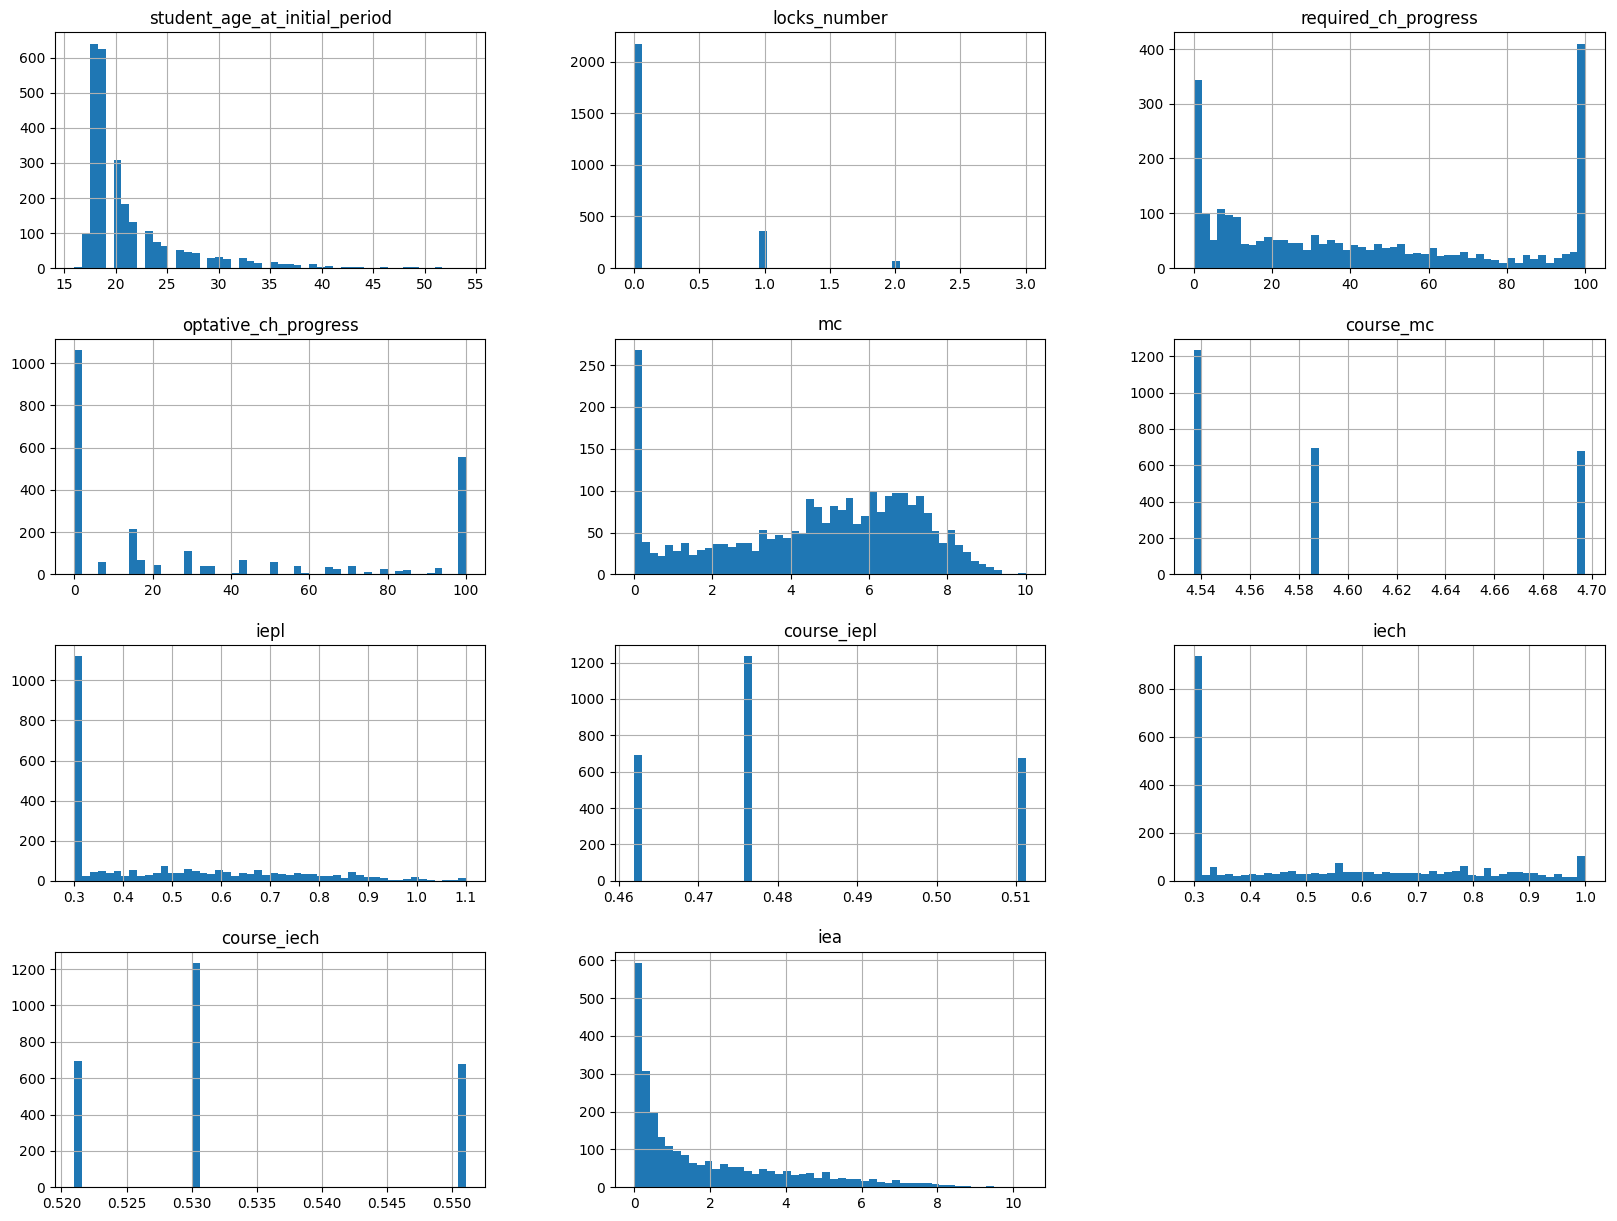

In [303]:
%matplotlib inline
import matplotlib as plt
evasao_reduzido.hist(bins=50, figsize=(20,15))
plt

#### Tentado entender quais são as opções de curriculum_status

In [304]:
filtro = evasao_reduzido[evasao_reduzido['curriculum_status'] == 'FORMANDO']
## filtro = evasao_reduzido[evasao_reduzido['curriculum_status'] == 'Ano/Período Letivo Inicial:']
## filtro = evasao_reduzido[evasao_reduzido['curriculum_status'] == 'Índices Acadêmicos']

filtro

,course_name,student_age_at_initial_period,birth_place,ingress_form,locks_number,required_ch_progress,optative_ch_progress,curriculum_status,mc,course_mc,iepl,course_iepl,iech,course_iech,iea
141,CIÊNCIA DA COMPUTAÇÃO,19,ARACAJU/SE,VESTIBULAR,0,100.000000,100.000000,FORMANDO,5.38,4.537049,0.583,0.476704,0.576,0.530138,1.8066
423,CIÊNCIA DA COMPUTAÇÃO,18,ARACAJU/SE,VESTIBULAR,0,100.000000,100.000000,FORMANDO,6.41,4.537049,0.653,0.476704,0.808,0.530138,3.3821
599,CIÊNCIA DA COMPUTAÇÃO,23,ARACAJU/SE,VESTIBULAR,0,100.000000,100.000000,FORMANDO,7.62,4.537049,0.604,0.476704,0.773,0.530138,3.5577
618,CIÊNCIA DA COMPUTAÇÃO,18,ARACAJU/SE,VESTIBULAR,0,97.368421,100.000000,FORMANDO,6.54,4.537049,0.742,0.476704,0.861,0.530138,4.1782
735,CIÊNCIA DA COMPUTAÇÃO,19,LAGARTO/SE,VESTIBULAR,0,92.105263,64.285714,FORMANDO,8.08,4.537049,0.897,0.476704,0.948,0.530138,6.8709
764,CIÊNCIA DA COMPUTAÇÃO,26,LAGARTO/SE,TRANSFERÊNCIA INTERNA,0,100.000000,100.000000,FORMANDO,5.83,4.537049,0.379,0.476704,0.535,0.530138,1.1821
1010,CIÊNCIA DA COMPUTAÇÃO,21,ARACAJU/SE,TRANSFERÊNCIA INTERNA,0,92.105263,100.000000,FORMANDO,8.06,4.537049,0.820,0.476704,0.944,0.530138,6.2391
1399,SISTEMAS DE INFORMAÇÃO,23,ARACAJU/SE,VESTIBULAR,0,100.000000,100.000000,FORMANDO,5.53,4.586078,0.455,0.461930,0.638,0.521000,1.6053
1453,SISTEMAS DE INFORMAÇÃO,22,ARACAJU/SE,VESTIBULAR,0,97.468354,91.666667,FORMANDO,5.69,4.586078,0.560,0.461930,0.619,0.521000,1.9724
1514,SISTEMAS DE INFORMAÇÃO,21,ARACAJU/SE,VESTIBULAR,0,100.000000,100.000000,FORMANDO,7.28,4.586078,0.785,0.461930,0.883,0.521000,5.0462


#### Como possuem ch_obg e ch_opt concluída e possui MC > 5, acreiditei que poderia agrupar para ter apenas dois possíveis resultados e assim criar meu label

In [305]:
mapeamento = {
    'TRANCADO': 'CANCELADO',
    'FORMANDO': 'CONCLUÍDO',
    'Índices Acadêmicos': 'CONCLUÍDO',
    'Ano/Período Letivo Inicial:': 'CONCLUÍDO'
}

evasao_reduzido['curriculum_status'] = evasao_reduzido['curriculum_status'].replace(mapeamento)
evasao_reduzido['curriculum_status'].value_counts()

curriculum_status
CANCELADO    1249
ATIVO        1004
CONCLUÍDO     350
Name: count, dtype: int64

## Por um segundo pensei que a idade dele fosse relevante, mas não tem como afirmar a idade quando houve a evasao/conclusao

In [306]:
# from datetime import datetime
# ano_atual = datetime.now().year
# evasao_reduzido['age'] = evasao_reduzido['birthday'].apply(lambda x: ano_atual - int(x.split('-')[0]))

#### Agora eis a dúvida, eu posso treinar meu modelo com dados de alunos ativos? sendo que esse deveria ser meu label? dessa vez eu reduzi o conjunto para apenas os que Estivessem cancelado ou concluído

In [307]:
evasao_whithout_ativos = evasao_reduzido[evasao_reduzido['curriculum_status'] != 'ATIVO'].copy()
evasao_whithout_ativos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1599 entries, 0 to 2601
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   course_name                    1599 non-null   object 
 1   student_age_at_initial_period  1599 non-null   int64  
 2   birth_place                    1596 non-null   object 
 3   ingress_form                   1599 non-null   object 
 4   locks_number                   1599 non-null   int64  
 5   required_ch_progress           1599 non-null   float64
 6   optative_ch_progress           1599 non-null   float64
 7   curriculum_status              1599 non-null   object 
 8   mc                             1599 non-null   float64
 9   course_mc                      1599 non-null   float64
 10  iepl                           1599 non-null   float64
 11  course_iepl                    1599 non-null   float64
 12  iech                           1599 non-null   float6

In [308]:
# Categorizando o curriculum status

evasao_whithout_ativos['status_num'] = evasao_whithout_ativos['curriculum_status'].apply(lambda x: 0 if x == "CANCELADO" else 1)
evasao_whithout_ativos.drop(columns=['curriculum_status'], inplace=True)

## Tentar um abordagem de seleção de modelo teste estratificada com a média do aluno, já que na minha visão está extremamente relacionado com a evasão

In [309]:
evasao_whithout_ativos['mc_cat'] = pd.cut(evasao_whithout_ativos['mc'], bins=[-1.0, 2.0, 4.0, 5.0, 7., 11.], labels=[1, 2, 3, 4, 5], right=True)

<Axes: >

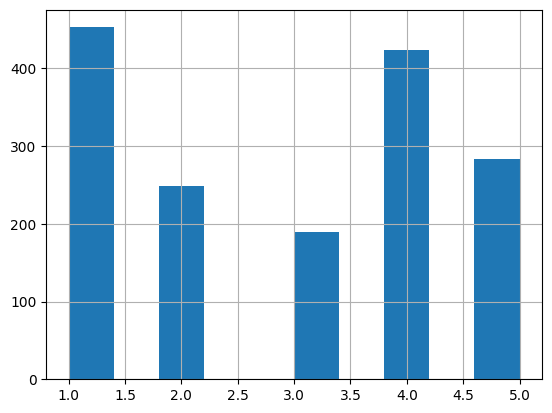

In [310]:
evasao_whithout_ativos['mc_cat'].hist()

In [311]:
from sklearn.model_selection import StratifiedShuffleSplit

# Como eu estou tratando de um recorte do dataset original preciso resetar os index
evasao_whithout_ativos = evasao_whithout_ativos.reset_index(drop=True)

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(evasao_whithout_ativos, evasao_whithout_ativos['mc_cat']):
    strat_train_set = evasao_whithout_ativos.loc[train_index]
    strat_test_set = evasao_whithout_ativos.loc[test_index]

In [312]:
# Confirmando que existe uma boa divisão entre os estratos
strat_test_set['mc_cat'].value_counts() / len(strat_test_set)

mc_cat
1    0.284375
4    0.265625
5    0.175000
2    0.156250
3    0.118750
Name: count, dtype: float64

In [313]:
# Removendo a coluna de categoria para o dataset voltar ao estado original
for set_ in (strat_test_set, strat_train_set):
    set_.drop('mc_cat', axis=1, inplace=True)

In [314]:
## Fazendo uma copia do modelo de treino
evasion = strat_train_set.copy()

### Procurando por correlação utilizando o curriculum status através do status_num(0 significa cancelado, 1 significa concluído)

In [315]:
evasion_numeric = evasion.select_dtypes(include=["number"])

corr_matrix = evasion_numeric.corr()

corr_matrix["status_num"].sort_values(ascending=False)

status_num                       1.000000
required_ch_progress             0.789811
iech                             0.737566
iea                              0.723879
optative_ch_progress             0.710223
iepl                             0.693292
mc                               0.556872
course_iech                     -0.063097
course_iepl                     -0.063451
course_mc                       -0.088929
locks_number                    -0.180088
student_age_at_initial_period   -0.187968
Name: status_num, dtype: float64

### Plotar alguns valores promissores

array([[<Axes: xlabel='required_ch_progress', ylabel='required_ch_progress'>,
        <Axes: xlabel='iech', ylabel='required_ch_progress'>,
        <Axes: xlabel='iea', ylabel='required_ch_progress'>,
        <Axes: xlabel='iepl', ylabel='required_ch_progress'>,
        <Axes: xlabel='mc', ylabel='required_ch_progress'>],
       [<Axes: xlabel='required_ch_progress', ylabel='iech'>,
        <Axes: xlabel='iech', ylabel='iech'>,
        <Axes: xlabel='iea', ylabel='iech'>,
        <Axes: xlabel='iepl', ylabel='iech'>,
        <Axes: xlabel='mc', ylabel='iech'>],
       [<Axes: xlabel='required_ch_progress', ylabel='iea'>,
        <Axes: xlabel='iech', ylabel='iea'>,
        <Axes: xlabel='iea', ylabel='iea'>,
        <Axes: xlabel='iepl', ylabel='iea'>,
        <Axes: xlabel='mc', ylabel='iea'>],
       [<Axes: xlabel='required_ch_progress', ylabel='iepl'>,
        <Axes: xlabel='iech', ylabel='iepl'>,
        <Axes: xlabel='iea', ylabel='iepl'>,
        <Axes: xlabel='iepl', ylabel='ie

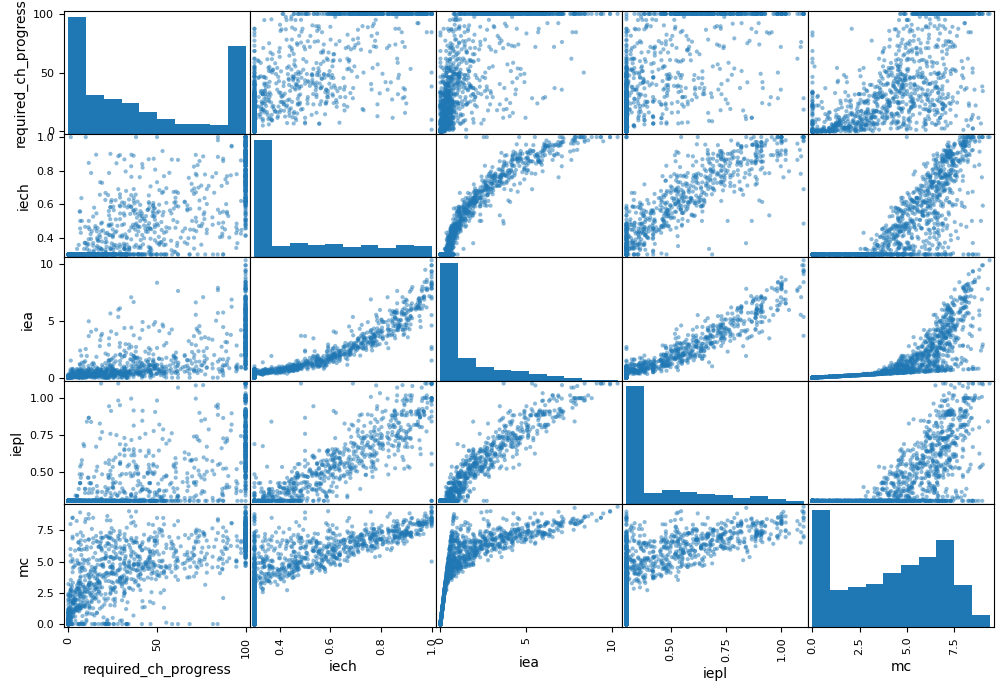

In [316]:
from pandas.plotting import scatter_matrix

attributes = ['required_ch_progress', 'iech', 'iea', 'iepl', 'mc']
scatter_matrix(evasion[attributes], figsize=(12, 8))

<Axes: xlabel='status_num', ylabel='mc'>

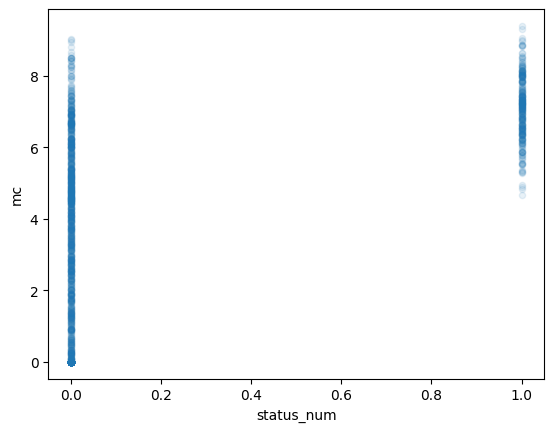

In [317]:
# Confirmando que os alunos com MC < 5 não concluem, porém isso talvez cause um underfit?
evasion.plot(kind='scatter', x='status_num', y='mc', alpha=0.1)

## Preparando os dados para algoritmos de ML

In [318]:
evasion = strat_train_set.drop('status_num', axis=1)
evasion_labels = strat_train_set['status_num'].copy()

In [319]:
evasion['birth_place'] = evasion['birth_place'].fillna('Desconhecido')

print(evasion['birth_place'].isna().sum())

0


#### Convertendo valores categóricos

In [320]:
# Separando os valores categórios e os númericos
evasion_cat = evasion[['course_name', 'birth_place', 'ingress_form']]
evasion_num = evasion.drop(['course_name', 'birth_place', 'ingress_form'], axis=1)

#### Criando as funções para transformações categóricas e númericas serem aplicadas em um pipeline

In [327]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Transformação categórica
cat_encoder = OneHotEncoder()
# evasion_cat_1hot = cat_encoder.fit_transform(evasion_cat)
# evasion_cat_1hot

# Númerica
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])

# evasion_num_tr = num_pipeline.fit_transform(evasion_num)

In [328]:
from sklearn.compose import ColumnTransformer

num_attribs = list(evasion_num)
cat_attribs = list(evasion_cat)

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs), 
    ("cat", OneHotEncoder(), cat_attribs),
])

evasion_prepared = full_pipeline.fit_transform(evasion)

In [329]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(evasion_prepared, evasion_labels)

LinearRegression()

In [330]:
some_data = evasion.iloc[:5]
some_labels = evasion_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [ 0.02676341 -0.02389603  0.75096319  0.70127333 -0.09712528]
Labels: [0, 0, 1, 1, 0]


In [331]:
from sklearn.metrics import mean_squared_error
evasion_predictions = lin_reg.predict(evasion_prepared)
lin_mse = mean_squared_error(evasion_labels, evasion_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(0.20835876303711448)